# Country Economic Conditions for Cargo Carriers

This report is written from the point of view of a data scientist preparing a report to the Head of Analytics for a logistics company. The company needs information on economic and financial conditions is different countries, including data on their international trade, to be aware of any situations that could affect business.

## Objective

The objective of this report is to determine what factors may be driving investment in a country. For our company, it is important to understand the drivers of global growth and investment, as it allows us to plan ahead for where there may be greater demand for cargo services in the future. We want to positions ourselves as the go-to logistics company globally. Positioning ourselves in growing trade hubs will serve the long-term strategic objectives of our global services.

## Data Summary

This dataset is taken from the International Monetary Fund (IMF) data bank. It lists country-level economic and financial statistics from all countries globally. This includes data such as gross domestic product (GDP), inflation, exports and imports, and government borrowing and revenue. The data is given in either US Dollars, or local currency depending on the country and year. Some variables, like inflation and unemployment, are given as percentages.

## Data Exploration

In [4]:
#Import required packages
import numpy as np
import pandas as pd
from sklearn import linear_model
from scipy import stats 
from numpy import *
from scipy.stats.mstats import normaltest
import math
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [182]:
#Import IMF World Economic Outlook Data from GitHub
WEO = pd.read_csv('https://raw.githubusercontent.com/jamiemfraser/machine_learning/main/WEOApr2021all.csv')
WEO=pd.DataFrame(WEO)
WEO.head()

,CountryCode,Country,Indicator,Notes,Units,Scale,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AFG,Afghanistan,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,NaN,NaN,1.481,1.348,...,4.510,4.754,2.205,0.291,1.353,0.768,1.623,1.434,2.237,2.209
1,AFG,Afghanistan,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,NaN,NaN,33.908,29.616,...,29.430,26.574,10.864,1.444,6.557,3.796,9.018,7.586,12.158,11.705
2,ALB,Albania,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,-0.246,-0.248,-0.443,-0.432,...,-1.351,-1.666,-1.257,-1.183,-1.430,-0.981,-0.898,-0.978,-1.024,-1.219
3,ALB,Albania,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,-7.070,-6.315,-10.179,-7.695,...,-11.321,-12.917,-10.202,-9.253,-10.797,-8.609,-7.572,-7.492,-6.758,-7.979
4,DZA,Algeria,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,9.142,7.060,4.359,8.808,...,12.157,19.802,12.290,0.835,-9.436,-27.290,-26.473,-22.081,-16.706,-17.150


In [183]:
#We are only interested in the most recent year for which data is available, 2019
WEO=WEO.drop(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], axis = 1)

#Reshape the data so each country is one observation
WEO=WEO.pivot_table(index=["Country"], columns='Indicator', values='2019').reset_index()
WEO.dropna(inplace=True)
WEO.head()

Indicator,Country,Current account balance,Employment,General government net lending/borrowing,General government revenue,General government total expenditure,"Gross domestic product per capita, constant prices","Gross domestic product per capita, current prices","Gross domestic product, constant prices","Inflation, average consumer prices",Total investment,Unemployment rate,Volume of exports of goods and services,Volume of imports of goods and services
8,Australia,4.9525,12.865,-40.2135,361.9895,402.2025,63894.200,61831.413333,987.3780,58.3800,22.544,5.150,3.313,-1.004
9,Austria,7.7475,4.337,1.6740,122.1255,120.4515,49263.665,51270.103333,187.7360,65.7460,25.471,4.525,2.943,2.448
15,Belgium,1.1055,4.978,-5.6135,144.3515,149.9650,45417.555,47458.873333,222.9465,54.5075,24.952,5.358,-0.079,-0.719
30,Canada,-18.8820,18.979,6.4965,500.1590,493.6625,52701.355,53147.910000,1052.0805,68.9660,22.988,5.733,1.267,0.346
39,Cyprus,-3.9415,0.416,0.8970,25.3930,24.4965,32609.890,32056.303333,12.3540,50.6670,19.687,7.075,-0.408,1.951


In [184]:
WEO.columns = ['Country', 'Current_account', 'Employment', 'Net_borrowing', 'Government_revenue', 'Government_expenditure', 'GDP_percap_constant', 'GDP_percap_current', 'GDP_constant', 'Inflation', 'Investment', 'Unemployment', 'Volume_exports', 'Volume_imports']
WEO.head()

,Country,Current_account,Employment,Net_borrowing,Government_revenue,Government_expenditure,GDP_percap_constant,GDP_percap_current,GDP_constant,Inflation,Investment,Unemployment,Volume_exports,Volume_imports
8,Australia,4.9525,12.865,-40.2135,361.9895,402.2025,63894.200,61831.413333,987.3780,58.3800,22.544,5.150,3.313,-1.004
9,Austria,7.7475,4.337,1.6740,122.1255,120.4515,49263.665,51270.103333,187.7360,65.7460,25.471,4.525,2.943,2.448
15,Belgium,1.1055,4.978,-5.6135,144.3515,149.9650,45417.555,47458.873333,222.9465,54.5075,24.952,5.358,-0.079,-0.719
30,Canada,-18.8820,18.979,6.4965,500.1590,493.6625,52701.355,53147.910000,1052.0805,68.9660,22.988,5.733,1.267,0.346
39,Cyprus,-3.9415,0.416,0.8970,25.3930,24.4965,32609.890,32056.303333,12.3540,50.6670,19.687,7.075,-0.408,1.951


<AxesSubplot:>

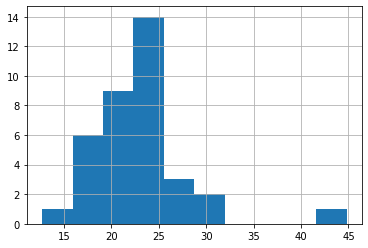

In [185]:
#Investment is our target variable, expressed as a percentage of GDP
WEO.Investment.hist()

In [186]:
#Perform a D'Agostino K^2 test to confirm the target variable is normally distributed
normaltest(WEO.Investment.values)

NormaltestResult(statistic=31.4620326554601, pvalue=1.4726733038407462e-07)

<AxesSubplot:>

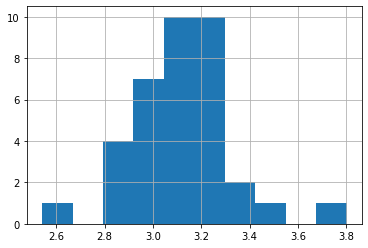

In [187]:
#The histogram shows that the data is clearly not normally distributed. Most data points are concentrated under 75% of GDP, with a few outliers.
#Because of the right-skewed data, I apply a log transformation
LogInvestment = np.log(WEO.Investment)
LogInvestment.hist()

In [188]:
normaltest(LogInvestment.values)
#Result returns a pvalue <0.05, so the log transformation does not result in a normally distributed dataset

NormaltestResult(statistic=9.043093776904758, pvalue=0.0108721925848446)

<AxesSubplot:>

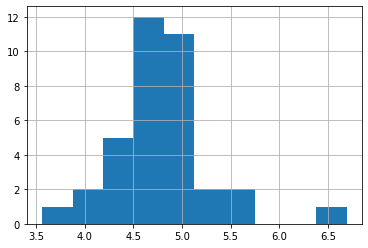

In [189]:
SqrtInvestment = np.sqrt(WEO.Investment)
SqrtInvestment.hist()

In [190]:
normaltest(SqrtInvestment.values)
#Result returns a pvalue <0.05, so the log transformation does not result in a normally distributed dataset

NormaltestResult(statistic=18.828964264816847, pvalue=8.153467790824642e-05)

In [191]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
bc_result = boxcox(WEO.Investment)
boxcox_investment = bc_result[0]
lam = bc_result[1]

(array([ 1.,  0.,  2.,  5.,  7., 14.,  4.,  2.,  0.,  1.]),
 array([1.69228794, 1.73486663, 1.77744531, 1.820024  , 1.86260268,
        1.90518137, 1.94776005, 1.99033873, 2.03291742, 2.0754961 ,
        2.11807479]),
 <BarContainer object of 10 artists>)

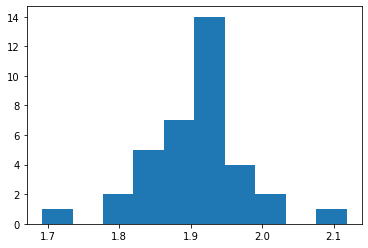

In [192]:
plt.hist(boxcox_investment)

In [193]:
normaltest(boxcox_investment)
#Result is still not above 0.05, but is much higher than the other transformations. Normality is not a necessary condition for regression, so this is ok to perform the analysis

NormaltestResult(statistic=6.99367174708098, pvalue=0.030293083085287914)

## Regression Models

The three models that I will use for this analysis are

1. Simple linear regression
2. Polynomial regression
3. LASSO regularization regression

### Model 1: Simple linear regression

In [194]:
lr=LinearRegression()
y_col = "Investment"

X = WEO.drop([y_col, "Country", "Volume_exports", "Volume_imports", "GDP_percap_current", "Government_revenue", "Government_expenditure", "Employment", "Unemployment"], axis=1)
y = WEO[y_col]

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=10000)
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

bc_result = boxcox(WEO.Investment)
boxcox_investment = bc_result[0]
lam = bc_result[1]
inv_boxcox(boxcox_Investment, lam)[:10]
WEO['Investment'].values[:10]

array([22.544, 25.471, 24.952, 22.988, 19.687, 26.941, 22.71 , 27.692,
       24.169, 24.183])

In [196]:
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
where_are_NaNs = isnan(y_pred_tran)
y_pred_tran[where_are_NaNs] = 0
y_pred_tran

array([2.13035892e+01, 1.90590968e+01, 0.00000000e+00, 9.74692039e-03,
       2.23915689e+01, 2.17004678e+01, 2.17743570e+01, 2.14068987e+01,
       1.76245403e+01, 1.70747897e+01, 1.95303227e+01])

In [197]:
r2_score(y_pred_tran,y_test)

-1.4036714822330865

### Model 2: Polynomial regression

In [198]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=10000)

s = StandardScaler()
X_train_s = s.fit_transform(X_train)

bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

bc_result = boxcox(WEO.Investment)
boxcox_investment = bc_result[0]
lam = bc_result[1]
inv_boxcox(boxcox_Investment, lam)[:10]
WEO['Investment'].values[:10]

array([22.544, 25.471, 24.952, 22.988, 19.687, 26.941, 22.71 , 27.692,
       24.169, 24.183])

In [199]:
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
where_are_NaNs = isnan(y_pred_tran)
y_pred_tran[where_are_NaNs] = 0
y_pred_tran

array([2.11429995e+01, 9.77261030e+00, 1.32966868e-06, 1.05109600e-12,
       1.90559825e+01, 1.26254655e+01, 3.88059643e+01, 1.31567281e+01,
       9.96165997e+00, 6.93812236e-01, 0.00000000e+00])

In [200]:
r2_score(y_pred_tran,y_test)

-1.4667889117067672

### Model 3: LASSO regularization regression

In [201]:
s = StandardScaler()
X_ss = s.fit_transform(X)
lr2 = LinearRegression()
lr2.fit(X_ss, y)
print(lr2.coef_) # coefficients now on the same scale

[-1.36851484 -0.52770028  1.3047872   0.38024079 -1.52658165]


In [202]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)
X_pf_ss = s.fit_transform(X_pf)
las = Lasso()
las.fit(X_pf_ss, y)
las.coef_

array([ 0.        ,  0.        ,  0.        ,  0.47742463, -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [203]:
las01 = Lasso(alpha = 0.1)
las01.fit(X_pf_ss, y)
print('sum of coefficients:', abs(las01.coef_).sum() )
print('number of coefficients not equal to 0:', (las01.coef_!=0).sum())

sum of coefficients: 3.2276099909914135
number of coefficients not equal to 0: 6


In [204]:
r2_score(y,las.predict(X_pf_ss))

0.04507336936338768

In [205]:
X_train_s = s.fit_transform(X_train)
las01.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = las01.predict(X_test_s)
r2_score(y_pred, y_test)

0.1768001199666167

### Recommendation

The above analysis shows the LASSO regression produces the highest R-squared value. I would recommend using this model for the analysis.

## Key Findings

The key finding of this model is that country-wide economic conditions can only explain about 17% of the variation in investment observed globally. This is an important finding for our company, as it indicates that country-specific context may be very important in determining what drives investment.

For our business, it is important to understand how and why countries invest so we can plan for future needs. More detailed analyses should be done on a case-by-case basis to inform strategic planning.

## Next Steps

The next steps would be to gather further data that could inform the analysis. Using only broad macroeconomic data may not provide all of the details to explain variation in investment rates for different countries. Some additional trade data, that includes balance of payments data, and further disaggregated investment data would be very useful for the analysis.